In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SEM 2\\Machine Learning\\Calorie_Burnt_Prediction_using_ML\\exercise.csv")
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [3]:
df2 = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SEM 2\\Machine Learning\\Calorie_Burnt_Prediction_using_ML\\calories.csv")
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df = pd.concat([df1,df2['Calories']],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
df = df.drop(['User_ID'],axis=1)
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [6]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: >

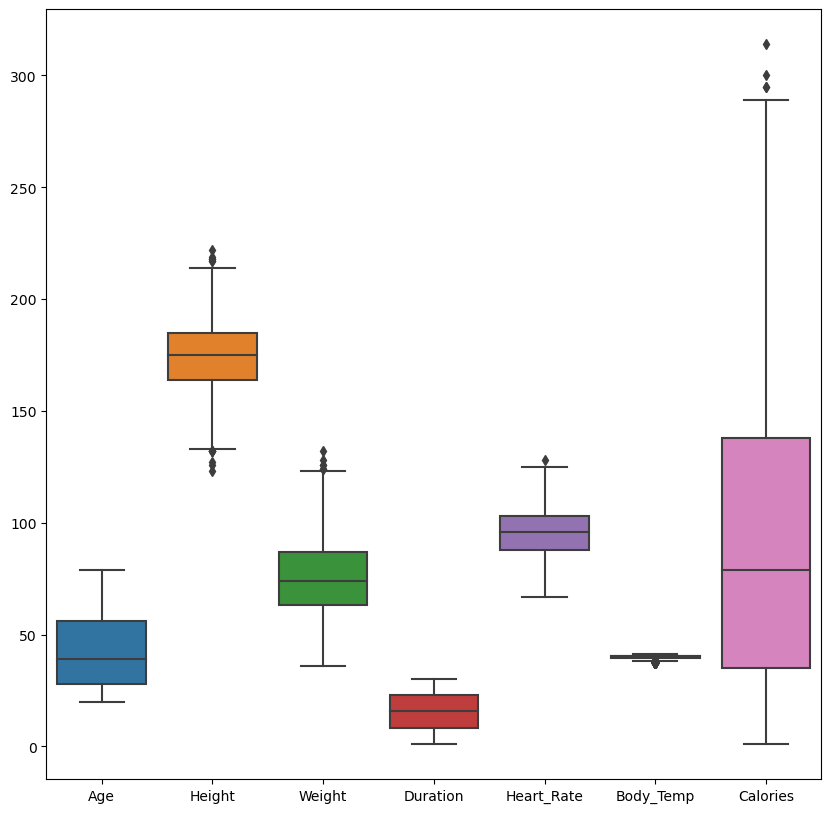

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

# HEIGHT

In [8]:
percentile25 = df['Height'].quantile(0.25)
percentile75 = df['Height'].quantile(0.75)
print("25 Percentile:",percentile25)
print("75 percentile",percentile75)

25 Percentile: 164.0
75 percentile 185.0


In [9]:
# IQR
iqr = percentile75 - percentile25
print("Inter Quartile Range:",iqr)

Inter Quartile Range: 21.0


In [10]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

Upper limit: 216.5
Lower limit: 132.5


Eliminating outliers and finding new dataframe

In [11]:
df_new = df[(df['Height']<upper_limit) & (df['Height']>lower_limit)]
df_new

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: >

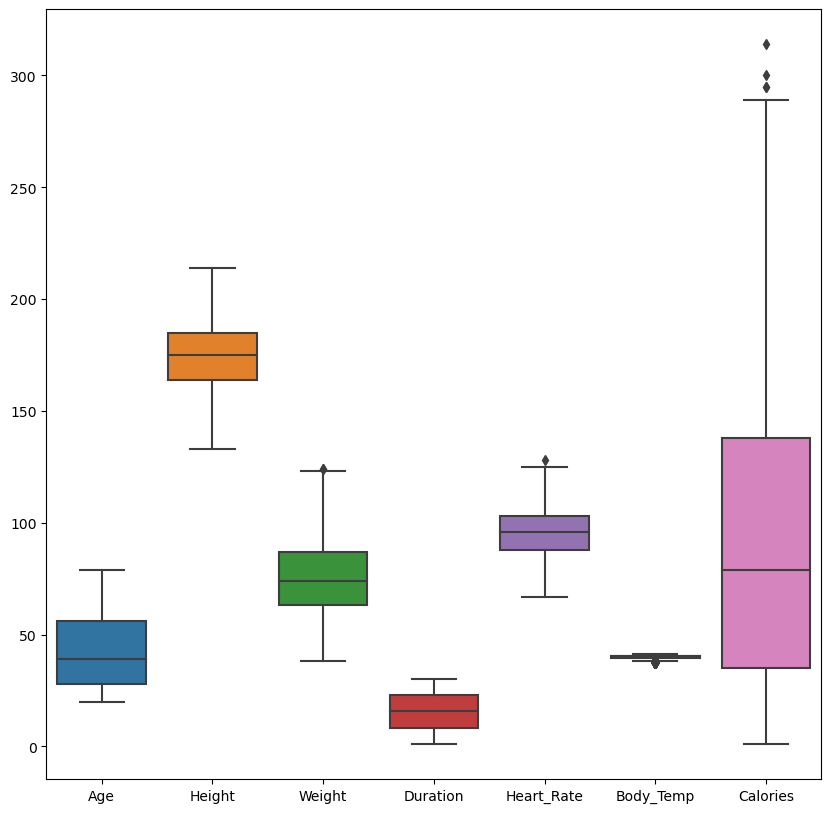

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(df_new)

# WEIGHT

In [13]:
percentile25 = df_new['Weight'].quantile(0.25)
percentile75 = df_new['Weight'].quantile(0.75)
print("25 Percentile:",percentile25)
print("75 percentile",percentile75)
# IQR
iqr = percentile75 - percentile25
print("Inter Quartile Range:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

25 Percentile: 63.0
75 percentile 87.0
Inter Quartile Range: 24.0
Upper limit: 123.0
Lower limit: 27.0


In [14]:
df_new = df_new[(df_new['Weight']<upper_limit) & (df_new['Weight']>lower_limit)]
df_new

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: >

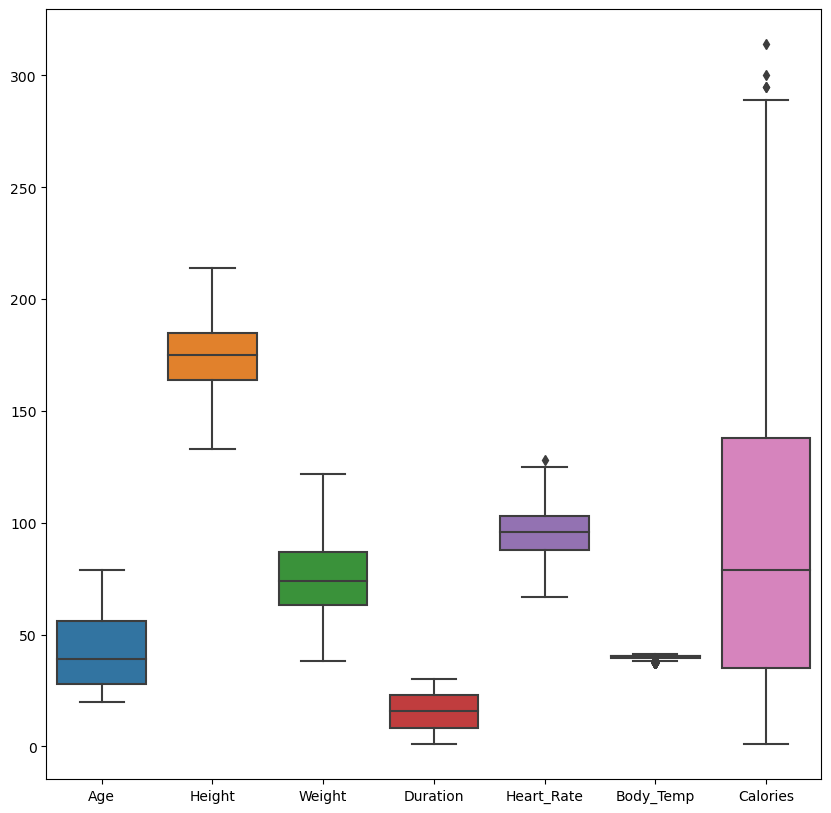

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(df_new)

# HEART_RATE

In [16]:
percentile25 = df_new['Heart_Rate'].quantile(0.25)
percentile75 = df_new['Heart_Rate'].quantile(0.75)
print("25 Percentile:",percentile25)
print("75 percentile",percentile75)
# IQR
iqr = percentile75 - percentile25
print("Inter Quartile Range:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

25 Percentile: 88.0
75 percentile 103.0
Inter Quartile Range: 15.0
Upper limit: 125.5
Lower limit: 65.5


In [17]:
df_new = df_new[(df_new['Heart_Rate']<upper_limit) & (df_new['Heart_Rate']>lower_limit)]
df_new

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: >

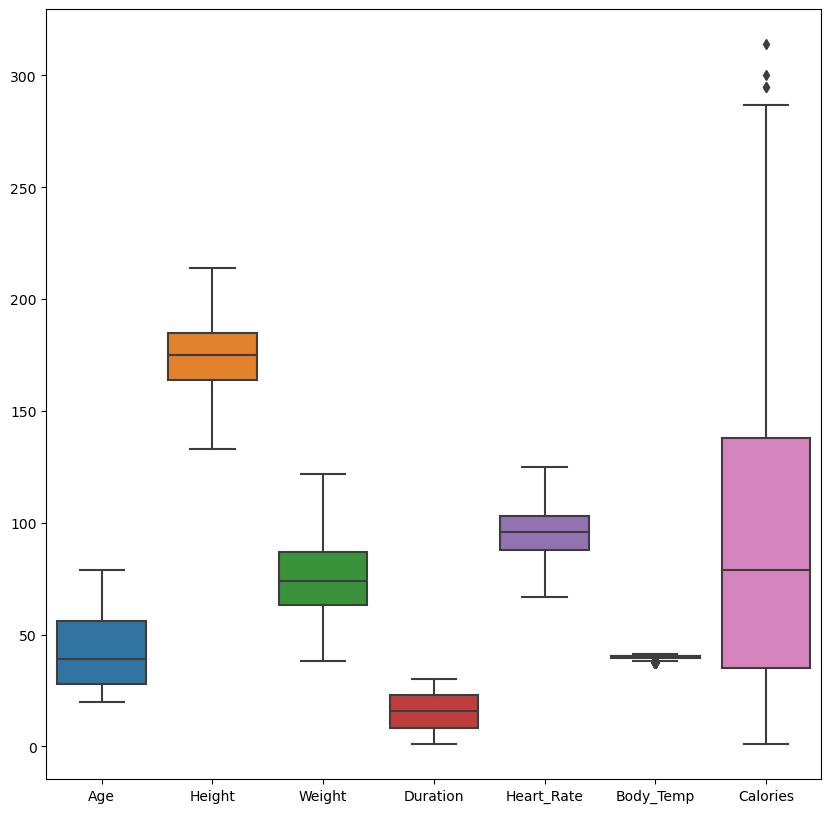

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(df_new)

In [19]:
df_new.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14982 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14982 non-null  object 
 1   Age         14982 non-null  int64  
 2   Height      14982 non-null  float64
 3   Weight      14982 non-null  float64
 4   Duration    14982 non-null  float64
 5   Heart_Rate  14982 non-null  float64
 6   Body_Temp   14982 non-null  float64
 7   Calories    14982 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [21]:
variable = {'male':0,'female':1}
df_new['Gender'] = df_new['Gender'].map(variable)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16684\3837705946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Gender'] = df_new['Gender'].map(variable)


In [22]:
df_new.shape

(14982, 8)

In [23]:
X = df_new[['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']]
Y = df_new['Calories']

In [24]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [25]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 14982, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [27]:
lr = LinearRegression()

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
lr.fit(X_train,Y_train)

LinearRegression()

In [30]:
y_predictions = lr.predict(X_test)
y_predictions

array([ 28.40115763,  15.85214758,  17.38741614, ..., 159.52252715,
        28.10105978,  81.39745642])

In [31]:
score = lr.score(X_train,Y_train)
r2 = metrics.r2_score(Y_test,y_predictions)
print(score,r2)

0.9673434182515641 0.9667977777756451


In [32]:
lr.predict(X_test[:5])

array([28.40115763, 15.85214758, 17.38741614, 47.0423845 , 71.12868479])

In [33]:
Y_test[:5]

8724     10.0
9770     18.0
8975     23.0
14208    44.0
5933     67.0
Name: Calories, dtype: float64

In [34]:
X_test.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
8724,1,57,160.0,57.0,2.0,90.0,38.0
9770,0,35,183.0,91.0,6.0,83.0,39.1
8975,0,62,184.0,83.0,8.0,75.0,39.5
14208,0,40,178.0,88.0,10.0,91.0,39.9
5933,1,20,172.0,71.0,14.0,96.0,39.9


In [35]:
value = df[(df['Age']==57) & (df['Height']==160.0) & (df['Weight']==57) & (df['Duration']==2.0)]
value

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
8724,female,57,160.0,57.0,2.0,90.0,38.0,10.0


In [36]:
df.loc[8724]

Gender        female
Age               57
Height         160.0
Weight          57.0
Duration         2.0
Heart_Rate      90.0
Body_Temp       38.0
Calories        10.0
Name: 8724, dtype: object